In [1]:
from numpy import *
from astropy.io import fits
from matplotlib.pyplot import *


with fits.open('/home/martin/work/Projects/CS20hackday/Praesepe.fits') as hdu:
    data = hdu[1].data


In [2]:
memprob = data['HDBscan_MemProb']
cluster = data['HDBscan_Cluster']

idx = (memprob >= 0.1) * (cluster == 1)

gaia_ra = data['gaia_dr2_source.ra'][idx]
gaia_dec = data['gaia_dr2_source.dec'][idx]

gaia_pmra = data['gaia_dr2_source.pmra'][idx]
gaia_pmdec = data['gaia_dr2_source.pmdec'][idx]

gaia_parallax = data['gaia_dr2_source.parallax'][idx]

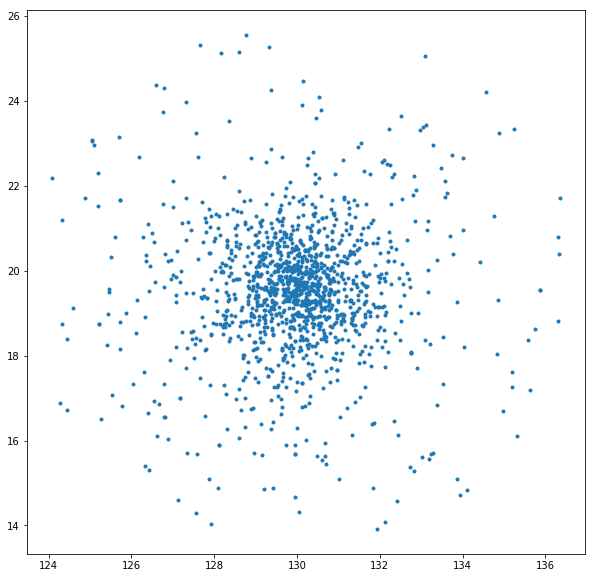

In [3]:
figure(figsize = (10,10))
plot(gaia_ra,gaia_dec,'.')
show()

In [4]:
from sklearn import cluster

arr = vstack((gaia_parallax,gaia_pmra,gaia_pmdec)).T

kmeans = cluster.KMeans(n_clusters = 2)

kmeans.fit(arr)

g0 = kmeans.labels_ == 0
g1 = kmeans.labels_ == 1


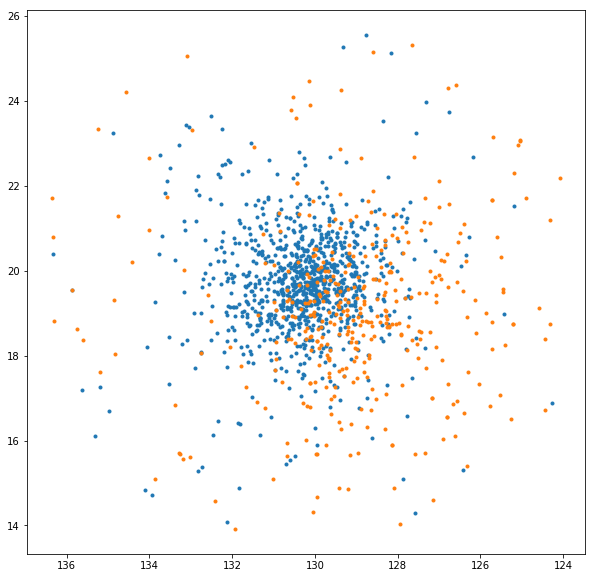

In [5]:
figure(figsize = (10,10))
plot(gaia_ra[g0],gaia_dec[g0],'.')
plot(gaia_ra[g1],gaia_dec[g1],'.')
gca().invert_xaxis()
show()

In [6]:
import corner

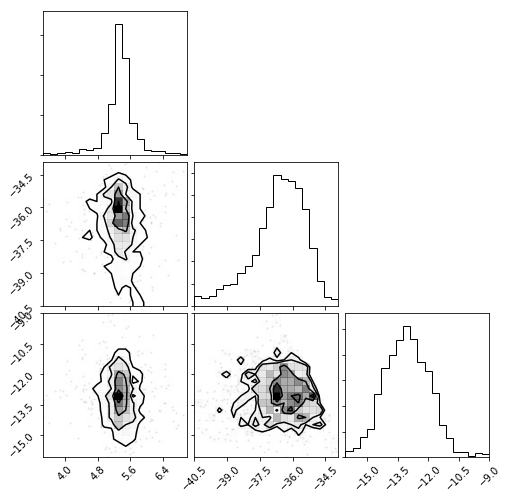

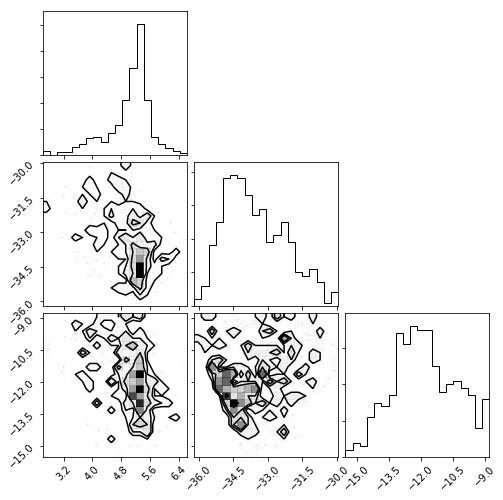

In [7]:
fig0 = corner.corner(arr[g0])
fig1 = corner.corner(arr[g1])

show()
